# Creating 3 sets of Polish names 
 - official version 
 - casual / informal
 - infantilized (very specific for Polsish languege) 

In [62]:
official = ['Piotr', 'Arek', 'Wiesław', 'Czesław', 'Ignacy', 
            'Anna', 'Katarzyna', 'Iwona', 'Krzysztof', 'Jan','Mikołaj'
]

casual = ['Piotrek', 'Poitr', 'Aras', 'Wiesiek', 'Czesiek', 
          'Ignacy','Ania', 'Kasia', 'Iwona', 'Krzysiek', 'Janek','Mikołaj'
]

infant = ['Piotruś', 'Aruś', 'Wiesiu', 'Czesiu', 'Ignaś', 'Anulka', 
          'Kasiunia', 'Iwonka', 'Jasiu', 'Jasieczek', 'Mikołajek', 'Miki'
]

# Pattern of a vecotr

Vector is a vectorised representation of a word or an expression.
Occurrence of a single feature in expression is represented by a single letter and by a combination of two letters.  



In [63]:
# Extended version of features with digits  
# letters = '1234567890abcdefghijklmnopqrstuvwxyz'

# Extended version of features without digits
letters = 'abcdefghijklmnopqrstuvwxyz'


combination = []

for l in letters:
    combination.append(l)
    
for l in letters:
    for l2 in letters:
        combination.append(l + l2)

print(f'Length of the vector {len(combination)}')
print(f'Contractions from 1000-1010 {combination[1000:1010]}')

Length of the vector 702
Contractions from 1000-1010 []


# Preprocesing of text 
 - lowercasing 
 - replacing polishch characters with the latin equivalents 

In [64]:
import re

def text_prepare(text: str):
    text = text.lower()

    text = re.sub('ą', 'a', text )
    text = re.sub('ę', 'e', text )
    text = re.sub('ć', 'c', text )
    text = re.sub('ó', 'o', text )
    text = re.sub('ł', 'l', text )
    text = re.sub('ź', 'z', text )
    text = re.sub('ż', 'z', text )
    text = re.sub('ń', 'n', text )
    text = re.sub('ś', 's', text )

    return text

dict_list = [official, casual, infant]

all_items = []

for i in dict_list:
    for ii in i:
        all_items.append(text_prepare(ii))

In [65]:
len(all_items)

35

# Vectorisation the data

In [66]:

def make_word_vector(word: str):
    vector = []
    for pattern in contraction:
        number_of_occurence = 1 if len(re.findall(pattern=pattern, string=word)) > 0 else 0
        vector.append(number_of_occurence)
    return(vector)

items_in_vectors = []

for item in all_items:
    items_in_vectors.append(make_word_vector(item))



Graphic representataion of the vectors

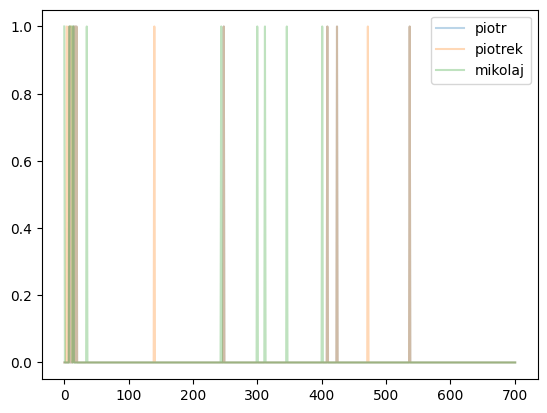

In [67]:
import matplotlib.pyplot as plt

for i in [0,11,22]:
    plt.plot(items_in_vectors[i], label=all_items[i], alpha=0.3)
    #plt.plot(items_in_vectors[1], label=all_items[1], alpha=0.7)

plt.legend()
plt.show()

# Clustering models
Model: **KMeans** 

In [ ]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering

X = items_in_vectors


# number of clusters is set arbitrary to 11 
n_cluster = 11

model = KMeans(n_clusters=n_cluster, random_state=42, algorithm='lloyd')

model.fit(X)

KMeans(n_clusters=11, random_state=42)

In [69]:
results = model.predict(items_in_vectors)

results

array([ 5,  0, 10, 10,  8,  1,  1,  9,  4,  1,  2,  5,  5,  0,  3,  6,  8,
        1,  7,  9,  6,  1,  2,  5,  0,  3,  6,  8,  1,  7,  9,  7,  6,  2,
        2], dtype=int32)

In [70]:
def clusters_occurence(results, n_clusters: int):
    for i in range(n_clusters):
        print([all_items[index] for index, value in enumerate(results) if value == i])
    

In [71]:
clusters_occurence(results, n_cluster)

model.score(X)

['arek', 'aras', 'arus']
['anna', 'katarzyna', 'jan', 'ania', 'janek', 'anulka']
['mikolaj', 'mikolaj', 'mikolajek', 'miki']
['wiesiek', 'wiesiu']
['krzysztof']
['piotr', 'piotrek', 'poitr', 'piotrus']
['czesiek', 'krzysiek', 'czesiu', 'jasieczek']
['kasia', 'kasiunia', 'jasiu']
['ignacy', 'ignacy', 'ignas']
['iwona', 'iwona', 'iwonka']
['wieslaw', 'czeslaw']


-86.25

Model **AffinityPropagation**

In [72]:
modelAP = AffinityPropagation(random_state=42)

In [73]:
modelAP.fit(X)

resultsAP = modelAP.predict(X)

len(set(resultsAP))

clusters_occurence(resultsAP, len(set(resultsAP)))




['piotr', 'piotrek', 'poitr', 'piotrus']
['wieslaw', 'czeslaw', 'wiesiu']
['ignacy', 'ignacy', 'ignas']
['krzysztof']
['anna', 'jan', 'ania', 'janek', 'anulka']
['arek', 'katarzyna', 'aras', 'arus']
['wiesiek', 'czesiek', 'krzysiek', 'czesiu', 'jasieczek']
['kasia', 'kasiunia', 'jasiu']
['iwona', 'iwona', 'iwonka']
['mikolaj', 'mikolaj', 'mikolajek', 'miki']


Model **AgglomerativeClustering**

In [74]:
modelAC = AgglomerativeClustering(n_clusters=n_cluster)
modelAC.fit(X)

resultsAC = modelAC.labels_

clusters_occurence(resultsAC, n_clusters=n_cluster)

['wiesiek', 'czesiek', 'wiesiu', 'czesiu', 'jasieczek']
['mikolaj', 'mikolaj', 'mikolajek', 'miki']
['krzysztof', 'krzysiek']
['anna', 'jan', 'ania', 'janek', 'anulka']
['piotr', 'piotrek', 'poitr', 'piotrus']
['ignacy', 'ignacy', 'ignas']
['iwona', 'iwona', 'iwonka']
['kasia', 'kasiunia', 'jasiu']
['arek', 'aras', 'arus']
['wieslaw', 'czeslaw']
['katarzyna']
